<a href="https://colab.research.google.com/github/naitoyuma3230/python-anlysis/blob/master/covid_map_anlysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# コロナ感染者のオープンデータを使用した分析マップ作成

## 使用するデータの取得

[東京都_新型コロナウイルス感染症陽性者数（区市町村別）](https://catalog.data.metro.tokyo.lg.jp/dataset/t000010d0000000085/resource/48c59f92-deae-44d0-a653-72576543df4f)からcsvデータをダウンロードして取得する

In [ ]:
import pandas as pd

df = pd.read_csv('/content/covid-data/130001_tokyo_covid19_positive_cases_by_municipality.csv')
df


,全国地方公共団体コード,都道府県名,市区町村名,公表_年月日,集計区分,陽性者数
0,131016.0,東京都,千代田区,2020-03-31,市区町村,3
1,131024.0,東京都,中央区,2020-03-31,市区町村,19
2,131032.0,東京都,港区,2020-03-31,市区町村,39
3,131041.0,東京都,新宿区,2020-03-31,市区町村,22
4,131059.0,東京都,文京区,2020-03-31,市区町村,4
...,...,...,...,...,...,...
58171,134015.0,東京都,八丈町,2022-09-25,市区町村,676
58172,134023.0,東京都,青ヶ島村,2022-09-25,市区町村,7
58173,134210.0,東京都,小笠原村,2022-09-25,市区町村,367
58174,NaN,NaN,NaN,2022-09-25,都外,276485


東京都の各地区のマップデータ、緯度、経度情報をダウンロード

In [ ]:
df_city = pd.read_csv('/content/covid-data/city.csv')
df_city


,市区町村名,緯度,経度
0,千代田区,35.694031,139.753772
1,中央区,35.670639,139.771989
2,港区,35.658081,139.751508
3,新宿区,35.693825,139.703356
4,文京区,35.707869,139.752437
...,...,...,...
57,三宅村,34.075757,139.478434
58,御蔵島村,33.897380,139.595802
59,八丈町,33.112789,139.788992
60,青ヶ島村,32.466533,139.763611


## データの前処理

### 欠損データの確認

In [ ]:
df.isnull().sum()


全国地方公共団体コード    1818
都道府県名          1818
市区町村名          1818
公表_年月日            0
集計区分              0
陽性者数              0
dtype: int64

全58176件中、市区町村名の欠損が818件あることが分かる。  
欠損を持つデータに偏りがないものとして、欠損項目を持つデータを削除する。

In [ ]:
df = df.dropna(how='any')
df

,全国地方公共団体コード,都道府県名,市区町村名,公表_年月日,集計区分,陽性者数
0,131016.0,東京都,千代田区,2020-03-31,市区町村,3
1,131024.0,東京都,中央区,2020-03-31,市区町村,19
2,131032.0,東京都,港区,2020-03-31,市区町村,39
3,131041.0,東京都,新宿区,2020-03-31,市区町村,22
4,131059.0,東京都,文京区,2020-03-31,市区町村,4
...,...,...,...,...,...,...
58169,133817.0,東京都,三宅村,2022-09-25,市区町村,261
58170,133825.0,東京都,御蔵島村,2022-09-25,市区町村,62
58171,134015.0,東京都,八丈町,2022-09-25,市区町村,676
58172,134023.0,東京都,青ヶ島村,2022-09-25,市区町村,7


In [ ]:
df.isnull().sum()


全国地方公共団体コード    0
都道府県名          0
市区町村名          0
公表_年月日         0
集計区分           0
陽性者数           0
dtype: int64

欠損データは0件となった。

### 外れ値の検出

このデータにおける陽性者について  
世田谷区に絞ってグラフ化して推移を見ると累計陽性者数であることがわかる

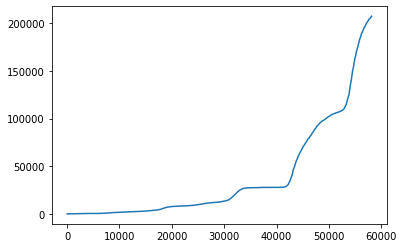

In [ ]:
df[df['市区町村名'] == '世田谷区']['陽性者数'].plot.line()


describeメソッドを使用し陽性者の行数、平均値、標準偏差、最小値、四分位数、最大値を算出

In [ ]:
df['陽性者数'].describe()

count     56358.000000
mean       8296.075056
std       18965.178507
min           0.000000
25%          68.000000
50%        1042.000000
75%        6842.750000
max      207125.000000
Name: 陽性者数, dtype: float64

陽性者数について箱ひげ図を作成する

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38525 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24615 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32773 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 38525 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 24615 missing from current font.
  font.set_te

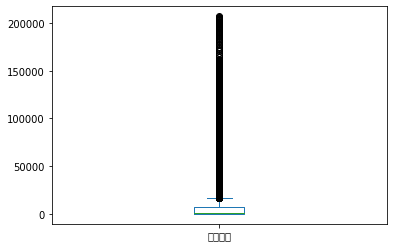

In [ ]:
df['陽性者数'].plot.box()


プロットした箱ひげ図を見ると最小値が0付近にあること、また最大値が200000より少し上となっている。  
最大値207125を考慮しても外れ値はないと思われる

## データ処理  

公表日が2021-08-03のものに絞る

In [ ]:
df = df[df['公表_年月日'] == '2021-08-03']
df


,全国地方公共団体コード,都道府県名,市区町村名,公表_年月日,集計区分,陽性者数
31360,131016.0,東京都,千代田区,2021-08-03,市区町村,1195
31361,131024.0,東京都,中央区,2021-08-03,市区町村,3682
31362,131032.0,東京都,港区,2021-08-03,市区町村,7176
31363,131041.0,東京都,新宿区,2021-08-03,市区町村,11944
31364,131059.0,東京都,文京区,2021-08-03,市区町村,3432
...,...,...,...,...,...,...
31417,133817.0,東京都,三宅村,2021-08-03,市区町村,5
31418,133825.0,東京都,御蔵島村,2021-08-03,市区町村,2
31419,134015.0,東京都,八丈町,2021-08-03,市区町村,9
31420,134023.0,東京都,青ヶ島村,2021-08-03,市区町村,0


このDataFrame(表)と各地区の座標情報のDataframeを組み合わせる。

In [ ]:
df = pd.merge(df, df_city, how='inner')
df


,全国地方公共団体コード,都道府県名,市区町村名,公表_年月日,集計区分,陽性者数,緯度,経度
0,131016.0,東京都,千代田区,2021-08-03,市区町村,1195,35.694031,139.753772
1,131024.0,東京都,中央区,2021-08-03,市区町村,3682,35.670639,139.771989
2,131032.0,東京都,港区,2021-08-03,市区町村,7176,35.658081,139.751508
3,131041.0,東京都,新宿区,2021-08-03,市区町村,11944,35.693825,139.703356
4,131059.0,東京都,文京区,2021-08-03,市区町村,3432,35.707869,139.752437
...,...,...,...,...,...,...,...,...
57,133817.0,東京都,三宅村,2021-08-03,市区町村,5,34.075757,139.478434
58,133825.0,東京都,御蔵島村,2021-08-03,市区町村,2,33.897380,139.595802
59,134015.0,東京都,八丈町,2021-08-03,市区町村,9,33.112789,139.788992
60,134023.0,東京都,青ヶ島村,2021-08-03,市区町村,0,32.466533,139.763611


陽性者情報のDFの市区町村名に合致した部分に緯度、経度情報が追加された。  
how=innerで内部結合を指定している。  
内部結合では合致しないデータは除外されるが、今回2つのDFの市区長村データは不足がないため、除外データはない

## 視覚化

plotlyで地図を使用した視覚化を実行できる  


プロットするポイントを指定
scatter_mapboxメソッドの引数に(DataFrame, DataFrame内の緯度カラム,経度カラム)  

update_layoutでマップを呼び出している  

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(df, lat='緯度', lon='経度')
fig.update_layout(mapbox_style="open-street-map")
fig.show()


各地区の座標にプロットできた

ここに陽性者数の情報をプロットの大きさで視覚化する


In [ ]:
fig = px.scatter_mapbox(df, lat='緯度', lon='経度', size='陽性者数')
fig.update_layout(mapbox_style="open-street-map")
fig.show()


さらにプロットの色でも陽性者数を表現する

In [ ]:
fig = px.scatter_mapbox(df, lat='緯度', lon='経度', size='陽性者数', color='陽性者数')
fig.update_layout(mapbox_style="open-street-map")
fig.show()


zoom=9で拡大率の変更  
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})で余白の削除  
fig.update_layout(mapbox=dict(center=go.layout.mapbox.Center(lat=35.6,lon=139.6)))で中央の変更

In [ ]:
import plotly.graph_objects as go

fig = px.scatter_mapbox(df, lat='緯度', lon='経度', size='陽性者数', color='陽性者数', zoom=9)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(mapbox=dict(center=go.layout.mapbox.Center(lat=35.6,lon=139.6)))
fig.show()


更にホバーした時に情報を表示  


In [ ]:
fig = px.scatter_mapbox(df, lat='緯度', lon='経度', size='陽性者数', color='陽性者数', zoom=9, hover_name='市区町村名')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(mapbox=dict(center=go.layout.mapbox.Center(lat=35.6,lon=139.6)))
fig.show()
